xvector_dvector_inspection 
------------------------

왜 xvector는 PDLA에서 엄청나게 좋은 성능을 내는가?

다른 논문에서는 xvector+LDA/PLDA가 엄청나게 좋은 성능을 보이지 않는데.. 혹시 augmentation 효과가 큰건가?

일단 dvector와 무엇이 다른지 emprical하게 알아보고자 한다.

- input_frame에 따른 성능변화의 차이?
- lda이후에 xvector와 dvector가 어떻게 변하나?
- centering과 length normalization 이후의 변화는?


### Environment

In [171]:
%load_ext autoreload
%autoreload 2
# %pylab
%matplotlib inline

import pandas as pd
import pickle
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [202]:
sys.path.append('/host/projects/sv_experiments/')
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="3"

## x-vector inspection

In [4]:
# si_keys = pickle.load(open("../../embeddings/voxc12/xvectors/xvectors_tdnn6b/train_feat/key.pkl", "rb"))
# si_embeds = np.load("../../embeddings/voxc12/xvectors/xvectors_tdnn6b/train_feat/feat.npy")

sv_keys = pickle.load(open("../../embeddings/voxc12/xvectors/xvectors_tdnn6b/test_feat/key.pkl", "rb"))
sv_embeds = np.load("../../embeddings/voxc12/xvectors/xvectors_tdnn6b/test_feat/feat.npy")

In [140]:
def key2df(keys, delimeter="-"):
    key_df = pd.DataFrame(keys, columns=['key'])
    key_df['spk'] = key_df.key.apply(lambda x: x.split(delimeter)[0])
    key_df['label'] = key_df.groupby('spk').ngroup()
    key_df['origin'] = key_df.spk.apply(lambda x: 'voxc2' if x.startswith('id') else 'voxc1')
    
    return key_df

In [7]:
# si_key_df = key2df(si_keys)
sv_key_df = key2df(sv_keys)

In [ ]:
import kaldi_io

si_lda_keys = []
si_lda_embeds = []
for k,v in kaldi_io.read_vec_flt_ark("../../embeddings/voxc12/xvectors/xvectors_tdnn6b/lda_train/lda_feats.ark"):
    si_lda_keys += [k]
    si_lda_embeds += [v]

In [157]:
# si_all_spks = si_key_df.spk.unique().tolist()
sv_all_spks = sv_key_df.spk.unique().tolist()

tsne_size =  40
tsne_spks = np.random.choice(sv_all_spks, size=tsne_size, replace=False)
spk2label = {k:i for i, k in enumerate(tsne_spks)}

tsne_df = sv_key_df[sv_key_df.spk.isin(tsne_spks)]
tsne_embeds = sv_embeds[tsne_df.index]

IndexError: index 5217 is out of bounds for axis 0 with size 4864

In [109]:
# %%time
import numpy as np
# from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE as TSNE
X = tsne_embeds
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(4874, 2)

In [116]:
import matplotlib.cm as cm
colors = cm.rainbow_r(np.linspace(0, 1, tsne_size))
c_label = tsne_df.spk.apply(lambda x: tsne_spks.tolist().index(x))

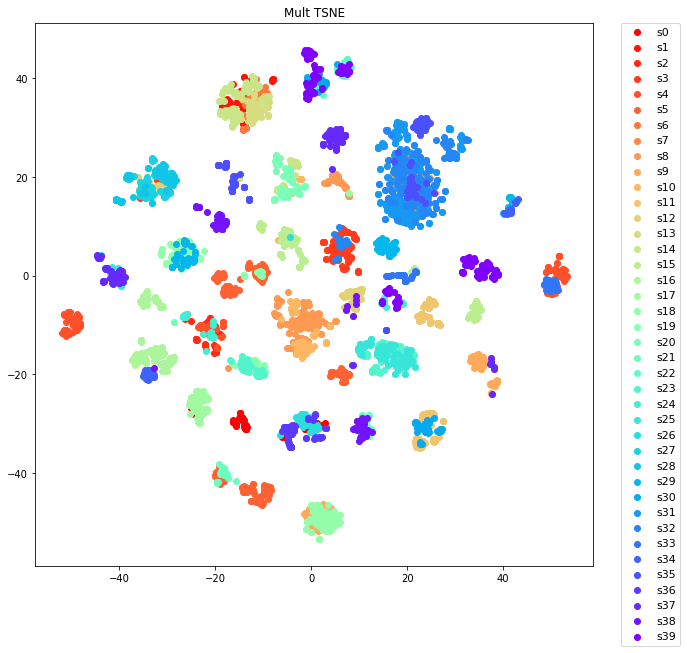

In [131]:
plt.figure(figsize=(10,10))
plt.title("Mult TSNE xvector")
for spk in tsne_spks:
    X = X_embedded[tsne_df[tsne_df.spk == spk].index]
    plt.scatter(X[:,0], X[:,1], c=colors[tsne_spks.tolist().index(spk)] )
# plt.scatter(X_embedded[:,0], X_embedded[:,1], c=colors[c_label])
plt.legend(['s{}'.format(i) for i in range(len(tsne_spks))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)

### LDA

In [182]:
# import kaldi_io

# si_keys = []
# si_embeds = []
# for k,v in kaldi_io.read_vec_flt_ark("../../embeddings/voxc12/xvectors/xvectors_tdnn6b/lda_train/lda_feats.ark"):
#     si_keys += [k]
#     si_embeds += [v]

# si_embeds = np.array(si_embeds)

In [195]:
import kaldi_io

sv_keys = []
sv_embeds = []
for k,v in kaldi_io.read_vec_flt_ark("../../embeddings/voxc12/xvectors/xvectors_tdnn6b/lda_test/lda_feats.ark"):
    sv_keys += [k]
    sv_embeds += [v]

sv_embeds = np.array(sv_embeds)

In [196]:
# si_key_df = key2df(si_keys)
sv_key_df = key2df(sv_keys)

In [197]:
sv_all_spks = sv_key_df.spk.unique().tolist()

tsne_size =  40
tsne_spks = np.random.choice(sv_all_spks, size=tsne_size, replace=False)
spk2label = {k:i for i, k in enumerate(tsne_spks)}

tsne_df = sv_key_df[sv_key_df.spk.isin(tsne_spks)]
tsne_embeds = sv_embeds[tsne_df.index]

In [198]:
# %%time
import numpy as np
# from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE as TSNE
X = tsne_embeds
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(4874, 2)

In [200]:
import matplotlib.cm as cm
colors = cm.rainbow_r(np.linspace(0, 1, tsne_size))
c_label = tsne_df.spk.apply(lambda x: tsne_spks.tolist().index(x))

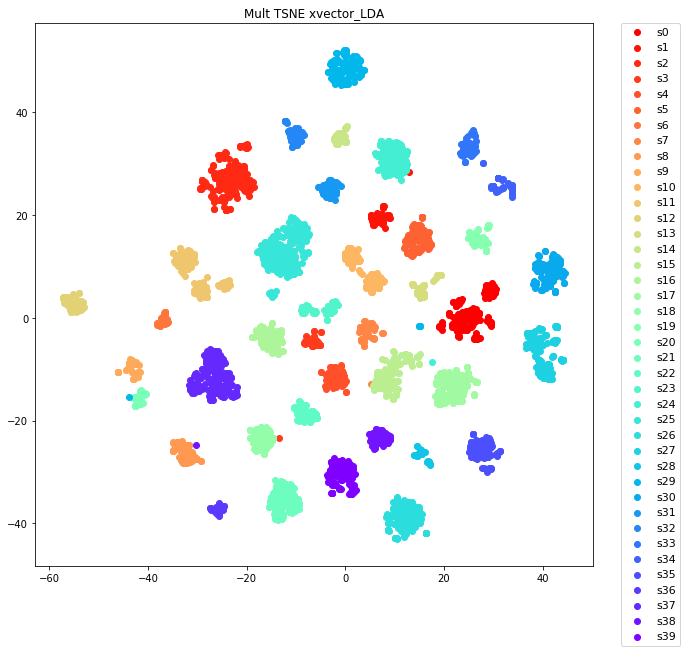

In [201]:
plt.figure(figsize=(10,10))
plt.title("Mult TSNE xvector_LDA")
for spk in tsne_spks:
    X = X_embedded[tsne_df[tsne_df.spk == spk].index]
    plt.scatter(X[:,0], X[:,1], c=colors[tsne_spks.tolist().index(spk)] )
# plt.scatter(X_embedded[:,0], X_embedded[:,1], c=colors[c_label])
plt.legend(['s{}'.format(i) for i in range(len(tsne_spks))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)

In [118]:
np.save("xvector_tsne_points.npy", X_embedded)
tsne_df.to_pickle("xvector_tsne_df.pkl")

## d-vector inspection

In [159]:
# si_keys = pickle.load(open("../../embeddings/voxc1/dvectors/ResNet34_v4_softmax/si_keys.pkl", "rb"))
# si_embeds = np.load("../../embeddings/voxc1/dvectors/ResNet34_v4_softmax/si_embeds.npy")

sv_keys = pickle.load(open("../../embeddings/voxc1/dvectors/ResNet34_v4_softmax/sv_keys.pkl", "rb"))
sv_embeds = np.load("../../embeddings/voxc12/dvesctors/Resnet34_v4_softmax/sv_embeds.npy")

In [164]:
# si_key_df = key2df(si_keys, delimeter='/')
sv_key_df = key2df(sv_keys, delimeter='/')

In [165]:
# si_all_spks = si_key_df.spk.unique().tolist()
sv_all_spks = sv_key_df.spk.unique().tolist()

tsne_size = 40
tsne_spks = np.random.choice(sv_all_spks, size=tsne_size, replace=False)
spk2label = {k:i for i, k in enumerate(tsne_spks)}

tsne_df = sv_key_df[sv_key_df.spk.isin(tsne_spks)]
tsne_embeds = sv_embeds[tsne_df.index]

In [167]:
# %%time
import numpy as np
# from sklearn.manifold import TSNE
from MulticoreTSNE import MulticoreTSNE as TSNE
X = tsne_embeds
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(4864, 2)

In [168]:
import matplotlib.cm as cm
colors = cm.rainbow_r(np.linspace(0, 1, tsne_size))
c_label = tsne_df.spk.apply(lambda x: tsne_spks.tolist().index(x))

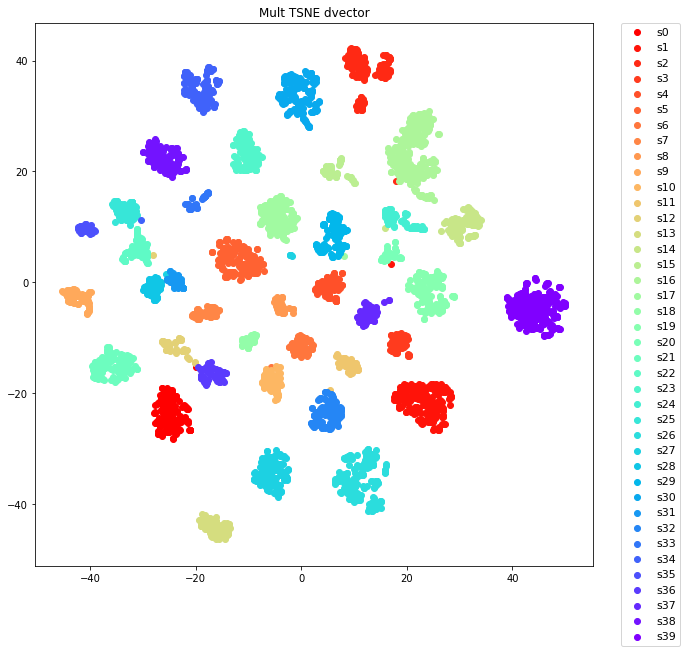

In [174]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.title("Mult TSNE dvector")
for spk in tsne_spks:
    X = X_embedded[tsne_df[tsne_df.spk == spk].index]
    plt.scatter(X[:,0], X[:,1], c=colors[tsne_spks.tolist().index(spk)] )
# plt.scatter(X_embedded[:,0], X_embedded[:,1], c=colors[c_label])
plt.legend(['s{}'.format(i) for i in range(len(tsne_spks))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)

In [ ]:
v